# Travel Insurance – Customer Profile and Habits

![Traveling](1149289.png)

## Company Background

Travel Assured has experienced major marketing cutbacks of more than 50% due to the COVID pandemic. The advertising budget is very limited, any advertising needs to ensure it is in the right places and in front of the right people. 

To assist Travel Assured, they have contracted me to find out the following:

-  *Are there any differences in the travel habits between customers and non-customers?*
    
- *What is the typical profile of customers and non-customers?*

First, let's import our libraries, load our data in and take a quick look at the first few rows.

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame
df = pd.read_csv("data/travel_insurance.csv")

# Print the number of rows and columns
print("Number of rows and columns:", df.shape)

# Print out the first five rows
df.head()

Number of rows and columns: (1987, 9)


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


Based on the data here, we have a total of 1,987 rows and 9 columns in our data. Now let's check the info() about index dtype, columns, non-null values and memory usage. This is useful to gauge if there are many missing values and to understand what data types you're dealing with. 

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


After comparing the csv spreadsheet to the information, I am going to update the Dtype for "Employment Type" and "GraduateOrNot"from object to Bool for later analysis and visualizations pulls.

In [90]:
df["GraduateOrNot"] = [ele.lower().capitalize()
      == "Yes" for ele in df["GraduateOrNot"]]
df['Employment Type'] = [ele == "Government Sector" for ele in df["Employment Type"]]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   bool  
 2   GraduateOrNot        1987 non-null   bool  
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: bool(2), int64(5), object(2)
memory usage: 112.7+ KB


This has updated the GraduateorNot field to True/False and the Employment Type to 1 for Goverment Sector and 0 for Private Sector/Self Employed. 

### Understanding columns and values

In [91]:
df.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

This looks to be a clean data set when it comes to nulls, which is good. 

Now, I will be looking at the potentially quantitative columns to get quick descriptive statistics and overview of data.

In [92]:
df[['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'TravelInsurance']].describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


This info let's me know the quick stats on min and max amounts along with the mean and std. This is very helpful to get an understanding of base values, so that when analysis is run later on, it will be easier to catch any potential anomalies in our data or if something doesn't look right when going to plot and visualize the data. 

Let's take a look at the unique values of the columns:

In [93]:
df.nunique().sort_values(ascending=False)

AnnualIncome           30
Age                    11
FamilyMembers           8
Employment Type         2
GraduateOrNot           2
ChronicDiseases         2
FrequentFlyer           2
EverTravelledAbroad     2
TravelInsurance         2
dtype: int64

As anticipated, the boolean style columns only returned 2 unique values. It looks like we have 8 unique family values, 11 different years for the Age and 30 different income amounts amongst the data. 

### Analyze The Data

To begin let's run a heatmap for correlation to see what factors, if any, will correlate to a customer purchasing Travel Insurance. 

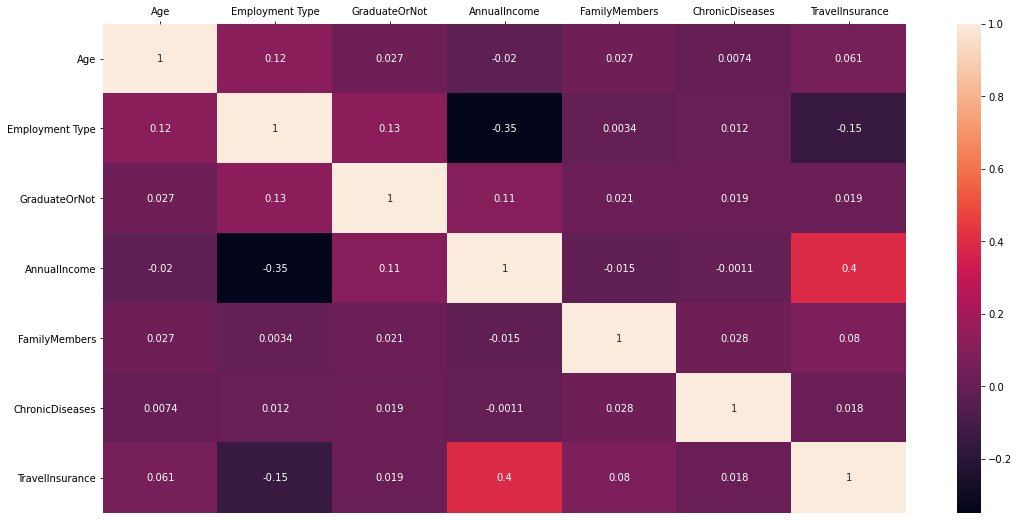

In [94]:
plt.figure(figsize=[18,9])

#plotting correlation plot

g= sns.heatmap(df.corr(), annot=True)
g.xaxis.set_ticks_position("top")
plt.savefig('heatmap.jpg')

From the heatmap, we can see that Annual Income has the strongest correlation to Travel Insurance purchases and we will be drilling down further on this when we break down customer vs non-customer information. All the other factors are considered to have relatively weak positive or negative correlation to Travel Insurance purchases. 

Now that I have broken down and viewed all columns correlations, I will break down the data into customer vs non-customers to begin running comparisons between customers and non-customers travel habits and profiles. 

In [95]:
non_cust = df[df['TravelInsurance']<1].sort_values(['Age'])

cust = df[df['TravelInsurance']==1].sort_values(['Age'])

In [96]:
#Viewing data info to see how many rows are in customers and non-customer datasets. 

print(non_cust.info())
print(cust.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 397 to 889
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1277 non-null   int64 
 1   Employment Type      1277 non-null   bool  
 2   GraduateOrNot        1277 non-null   bool  
 3   AnnualIncome         1277 non-null   int64 
 4   FamilyMembers        1277 non-null   int64 
 5   ChronicDiseases      1277 non-null   int64 
 6   FrequentFlyer        1277 non-null   object
 7   EverTravelledAbroad  1277 non-null   object
 8   TravelInsurance      1277 non-null   int64 
dtypes: bool(2), int64(5), object(2)
memory usage: 82.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 1589 to 1767
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  710 non-null    int64 
 1   Employment Type      710 non-

After splitting the information it show 710 total rows were customers and 1,277 rows were non-customers for travel insurance. 

### Are there differences in the travel habits between customers and non-customers?

Let's begin to explore the shareholder's first question on travellers habits and take a look at the Frequent Flyer and Ever Travelled Abroad columns to get an idea on both groups travel habits. 

Let's take a deeper dive into the Frequent Flyer data and see how customers and non-customers stack against one another. 

In [97]:
cust_FF = pd.concat([cust['FrequentFlyer'].value_counts(normalize=True), cust['FrequentFlyer'].value_counts()], 
                   axis = 1,
                   keys = ('percent', 'count'))
non_cust_FF = pd.concat([non_cust['FrequentFlyer'].value_counts(normalize=True), non_cust['FrequentFlyer'].value_counts()], 
                   axis = 1,
                   keys = ('percent', 'count'))
print(cust_FF)
print(non_cust_FF)

     percent  count
No   0.66338    471
Yes  0.33662    239
      percent  count
No   0.860611   1099
Yes  0.139389    178


After review, the majority of customer and non-customers are not likely to be involved with a Frequent Flyer program. However, 33.66% of Travel Assured customers are in fact Frequent Flyers while only 13.94% of non-customers show that they were a Frequent Flyer. This could maybe open up some marketing for Frequent Flyer sign up incentives for Travel Assured customers as a potential marketing campaign since more Travel Assured customers tend to also be apart of Frequent Flyer programs. 

Now let's take a look at customer and non-customers who have ever travelled abroad.

In [98]:
cust_abroad = pd.concat([cust["EverTravelledAbroad"].value_counts(normalize=True), cust["EverTravelledAbroad"].value_counts()], 
                   axis = 1,
                   keys = ('percent', 'count'))
non_cust_abroad = pd.concat([non_cust["EverTravelledAbroad"].value_counts(normalize=True), non_cust["EverTravelledAbroad"].value_counts()], 
                   axis = 1,
                   keys = ('percent', 'count'))
print(cust_abroad)
print(non_cust_abroad)


      percent  count
No   0.580282    412
Yes  0.419718    298
      percent  count
No   0.935787   1195
Yes  0.064213     82


This shows that around 41.97% of the Travel Assured customer base has Travelled Abroad while only a small 6.42% of non-customers travelled abroad. 

### Plotting the Travel Habits

Processing visualization on the value counts to get good visual on the two groups travel habits. 

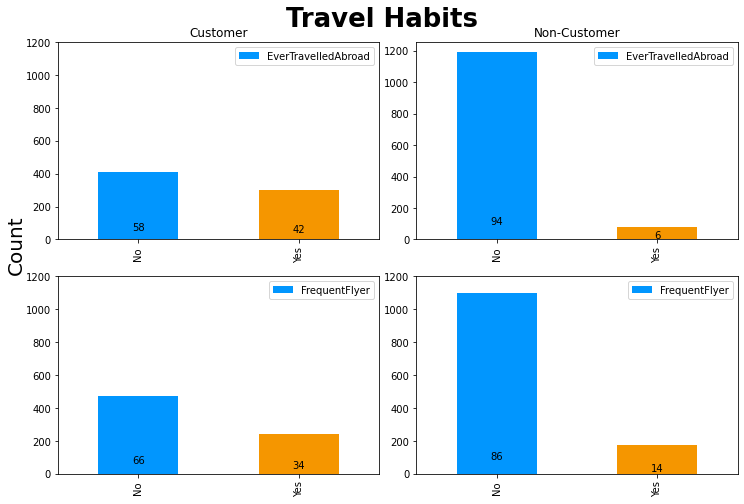

In [99]:
fig = plt.figure(figsize=(10,10))
fig_dims = (3,2)

# Plot customer for Ever Traveled Abroad
plt.subplot2grid(fig_dims, (0,0))
cust['EverTravelledAbroad'].value_counts().plot(kind='bar', title = "Customer", color = ['#0196fe','#f59600'])
plt.ylim([0,1200])
plt.legend(loc='best')

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center')
  
if __name__ == '__main__':
    # creating data on Customer Ever Travelled Abroad bar chart to be plot
    x = ["No", "Yes"]
    y = round((cust['EverTravelledAbroad'].value_counts(normalize=True)*100),0).astype(int)
    
addlabels(x, y)

#Plot customer for Frequent Flyer
plt.subplot2grid(fig_dims, (1,0))
cust['FrequentFlyer'].value_counts().plot(kind='bar', color = ['#0196fe','#f59600'])
plt.ylim([0,1200])
plt.legend(loc='best')

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center', va='baseline')
  
if __name__ == '__main__':
    # creating data on Customer Frequent Flyer bar chart to be plot
    x = ["No", "Yes"]
    y = round((cust['FrequentFlyer'].value_counts(normalize=True)*100),0).astype(int)
   
addlabels(x, y)

#Plot non-customer for Ever Traveled Abroad
plt.subplot2grid(fig_dims, (0,1))
non_cust['EverTravelledAbroad'].value_counts().plot(kind='bar', title = 'Non-Customer', color = ['#0196fe','#f59600'])
plt.legend(loc='best')

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center', va='baseline')
  
if __name__ == '__main__':
    # creating data on Non-Customer Ever Travelled Abroad bar chart to be plot
    x = ["No", "Yes"]
    y = round((non_cust['EverTravelledAbroad'].value_counts(normalize=True)*100),0).astype(int)
    
addlabels(x, y)

#Plot non-customer for Frequent Flyer
plt.subplot2grid(fig_dims, (1,1))

non_cust['FrequentFlyer'].value_counts().plot(kind='bar', color = ['#0196fe','#f59600'])

plt.ylim([0,1200])

plt.legend(loc='best')

plt.suptitle('Travel Habits', fontweight="bold", fontsize=26)

fig.text(-0.02, 0.65, 'Count', va='center', rotation='vertical', fontsize = 20,)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center', va='baseline')
  
if __name__ == '__main__':
    # creating data on Non-Customer Frequent Flyer bar chart to be plott
    x = ["No", "Yes"]
    y = round((non_cust['FrequentFlyer'].value_counts(normalize=True)*100),0).astype(int)
     
addlabels(x, y)

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.savefig('Travel_Habits.jpg',bbox_inches='tight')


The visuals confirm that travel insurance customers have different travelling habits than non-customers. Travel insurance customers are  more likely to have travelled abroad and are more likely be part of a Frequent Flyer program as well. 

Compiling demographic information to begin creating the customer and non-customer typical profiles.

In [100]:
cust_demog = pd.DataFrame(data = cust, columns =['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'TravelInsurance'])
non_cust_demog = pd.DataFrame(data = non_cust, columns =['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'TravelInsurance'])


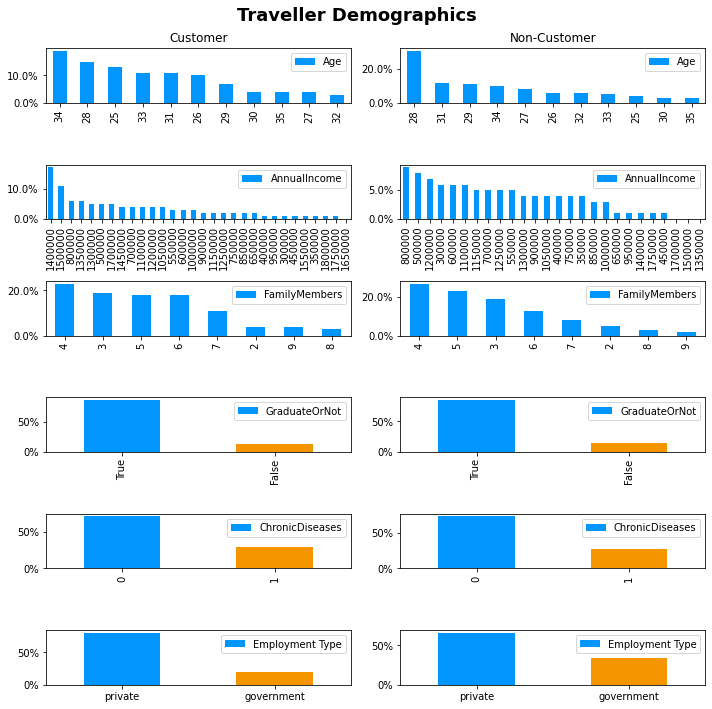

In [101]:
import matplotlib.ticker as mtick
fig = plt.figure(figsize=(10,10))
fig_dims = (6,2)


# Plot customer for Ever Traveled Abroad
plt.subplot2grid(fig_dims, (0,0))
round(cust_demog['Age'].value_counts(normalize=True), 2).plot(kind='bar', title = "Customer", color = ['#0196fe'])
plt.legend(loc='best')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#Plot non-customer for Ever Traveled Abroad
plt.subplot2grid(fig_dims, (0,1))
round(non_cust_demog['Age'].value_counts(normalize=True), 2).plot(kind='bar', title = "Non-Customer", color = ['#0196fe'])
plt.legend(loc='best')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#Plot customer for Frequent Flyer
plt.subplot2grid(fig_dims, (1,0))
round(cust_demog['AnnualIncome'].value_counts(normalize=True), 2).plot(kind='bar', color = ['#0196fe'])
plt.legend(loc='best')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#Plot non-customer for Frequent Flyer
plt.subplot2grid(fig_dims, (1,1))
round(non_cust_demog['AnnualIncome'].value_counts(normalize=True), 2).plot(kind='bar', color = ['#0196fe'])
plt.legend(loc='best')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#Plt
plt.subplot2grid(fig_dims, (2,0))
round(cust_demog['FamilyMembers'].value_counts(normalize=True), 2).plot(kind='bar', color = ['#0196fe'])
plt.legend(loc='best')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#Plt
plt.subplot2grid(fig_dims, (2,1))
round(non_cust_demog['FamilyMembers'].value_counts(normalize=True), 2).plot(kind='bar', color = ['#0196fe'])
plt.legend(loc='best')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#plt
plt.subplot2grid(fig_dims, (3,0))
round(cust_demog['GraduateOrNot'].value_counts(normalize=True), 2).plot(kind='bar', color = ['#0196fe','#f59600'])
plt.legend(loc='best')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#plt
plt.subplot2grid(fig_dims, (3,1))
round(non_cust_demog['GraduateOrNot'].value_counts(normalize=True), 2).plot(kind='bar', color = ['#0196fe','#f59600'])
plt.legend(loc='best')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#plt
plt.subplot2grid(fig_dims, (4,0))
round(cust_demog['ChronicDiseases'].value_counts(normalize=True), 2).plot(kind='bar', color = ['#0196fe','#f59600'])
plt.legend(loc='best')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#plt
plt.subplot2grid(fig_dims, (4,1))
round(non_cust_demog['ChronicDiseases'].value_counts(normalize=True), 2).plot(kind='bar', color = ['#0196fe','#f59600'])
plt.legend(loc='best')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#plt
plt.subplot2grid(fig_dims, (5,0))
round(cust_demog['Employment Type'].value_counts(normalize=True), 2).plot(kind='bar', color = ['#0196fe','#f59600'])
plt.legend(loc='best')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks([0,1],['private','government'], rotation=0)

plt.subplot2grid(fig_dims, (5,1))
round(non_cust_demog['Employment Type'].value_counts(normalize=True), 2).plot(kind='bar', color = ['#0196fe','#f59600'])
plt.legend(loc='best')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks([0,1],['private','government'], rotation=0)

fig.suptitle("Traveller Demographics",fontweight="bold", fontsize=18)
fig.tight_layout()
plt.savefig('Traveller_Demographics.jpg')

This group of charts gives us a pretty good idea of the demographic information split. However, the value_counts for Age and Income are somewhat spread, so let's go ahead and pull the top 3 for these categories to drill down more on these. Once we get this information, we can begin to build our typical customer and non-customer profiles for Travel Assured.

In [102]:
print(cust_demog['Age'].value_counts(normalize=True).mul(100).round(2).nlargest(5).astype(str)+ '%')
print(non_cust_demog['Age'].value_counts(normalize=True).mul(100).round(2).nlargest(5).astype(str)+ '%')

print(cust_demog['AnnualIncome'].value_counts(normalize=True).mul(100).round(2).nlargest(5).astype(str)+ '%')
print(non_cust_demog['AnnualIncome'].value_counts(normalize=True).mul(100).round(2).nlargest(5).astype(str)+ '%')

34    18.73%
28    14.79%
25    12.96%
33    10.99%
31    10.56%
Name: Age, dtype: object
28     31.4%
31    12.45%
29    11.04%
34    10.42%
27     8.14%
Name: Age, dtype: object
1400000    16.76%
1500000    11.13%
800000      5.77%
1350000     5.77%
1300000     4.93%
Name: AnnualIncome, dtype: object
800000     8.77%
500000     8.46%
1200000    6.73%
300000     6.42%
600000     6.19%
Name: AnnualIncome, dtype: object


In [103]:
Mean_cust_income = round(cust.AnnualIncome.mean(),2)
Mean_non_cust_income = round(non_cust.AnnualIncome.mean(), 2)
print("Customer Mean Income", " - ",("${:,.2f}".format(Mean_cust_income)))
print( "Non-Customer Mean Income", "-",("${:,.2f}".format(Mean_non_cust_income)))


Customer Mean Income  -  $1,133,239.44
Non-Customer Mean Income - $821,299.92


Based on the data it looks like Travel Assured customers are more likely to be above 30 while non-customers tend to be a little younger. 

When it comes to the income bracket, customers seem to have generally higher income ($1,133,239.44) as a whole while non-customers income is lower ($821,299.92). 

Now that we know and confirm that income impacts customers decision on travel insurance, let's visualize the data to get a better look. 

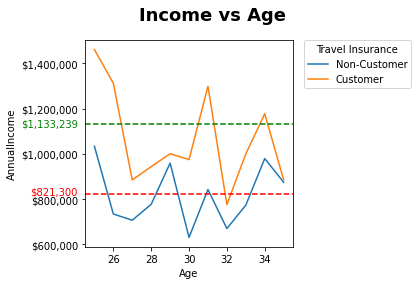

In [104]:
import matplotlib.transforms as transforms
import matplotlib.animation as animation

fig, ax = plt.subplots()

sns.lineplot(x = "Age", y="AnnualIncome", hue="TravelInsurance", data = df, ci=None)

plt.axhline(y=Mean_cust_income, color='green', ls='--')

trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,Mean_cust_income, "${:,.0f}".format(Mean_cust_income), color="green", transform=trans, 
        ha="right", va="center")

plt.axhline(y=Mean_non_cust_income, color='red', ls='--')

trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,Mean_non_cust_income, "${:,.0f}".format(Mean_non_cust_income), color="red", transform=trans, 
        ha="right", va="baseline")

ax.ticklabel_format(style='plain')

ax.yaxis.set_major_formatter('${x:1,.0f}')

plt.suptitle('Income vs Age', fontweight="bold", fontsize=18)

plt.legend(title = "Travel Insurance", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, labels =  ['Non-Customer', 'Customer'])

fig.tight_layout()

plt.savefig('Income_vs_Age.jpg',bbox_inches='tight')

This visual definitely paints a good picture to show that travel insurance customers have higher incomes for any age group than their non-customer incomes. 

### Recommendations

There are many things that can be done to market to the write groups for Travel Assurred. Below are a few recommendations for marketing:

- Run a contest for Frequent Flyers and Travel Abroad customers to get them engaged and act as a reminder for the product. The contest could be as simple as customers providing advice on how to travel safely during COVID and how to travel sustainably to ensure destinations locations to not only keep the environments clean, but support the communities in these areas as well. A small prize or international flight could be offered as an incentive. 

- Move marketing campaigns to afluent family friendly neighborhoods and areas and switch focus to these higher income individuals. This would be a solution to ensure the budget is getting in front of the right eyes at least until pandemic woes ease and budgets can be increased again. 

- Introduce a travel App that includes advice and updates on the current state of the world of travel. This could include best local cuisine, food and water safety, travel checklists, vaccination requirement and more. The app can even be targeted to be only for those who purchased or have purchased insurance. When someone purchases and downloads the app, the app could have options for real time agent connect for questions or have push notifications sent about their destination.

These are recommendations that will help ensure that the remaining marketing budget can use those resources to get in front of the customers that are more likely to increase close rates.

![Traveling](2532825.png)

## Conclusion

The past few years traversing the COVID pandemic has been rough on many business both big and small. Travel Assurred had to cut marketing budget by over 50% and needed answers to ensure their existing marketing is being put in front of the right people and in the right places.

Exploring the data let us know that customers are more likely to be Frequent Flyers and Travel Abroad than non-customers for travel insurance. We were also able to get a general profile for both customers and non-customers. 

Customers tend to be individuals who graduated college and are in their 30s with income around $1,100,00.00. Customers also typically have familyies of 3-5 members, no chronic diseases, and work in the private/self employed sector. 

Non-Customers are individuals who graduated college and are also in their 30s, however, their income is lower and around $821,300.00. Non-Customers also typically have families of 3-5 members, no chronic diseases, and work in the private/self employed sector. There is a larger portion of individuals in governement in the non-customers group, but the majority of individuals in the non-customer group were not. 

If you have made it to the end of this project, I would like to thank you for your time and consideration. Please feel free to connect with me on LinkedIn: [Chad Brooks](https://www.linkedin.com/in/chad-brooks51/) or Github: [Roc-Data-Analyst](https://github.com/Roc-Data-Analyst)